# Práctica 8: Análisis de varianza y de componentes principales.

En esta práctica se realizará una prueba de ANOVA para revisar los datos con los que se ha estado trabajando a lo largo de estos trabajos. Una prueba ANOVA es una herramienta para cuantificar sí o no una variable o factor tiene un efecto estadísticamente significativo en una variable de interés. Se realiza a partir de la salida del modelo de regresión que se obtiene con otra versión de ols.

Adicionalmente se realiza un PCA (Principal Component Analysis) es una técnica utilizada para describir un conjunto de datos en términos de nuevas "componentes" no correlacionadas. Los componentes se ordenan por la cantidad de varianza original que describen, por lo que la técnica es útil para reducir la dimensionalidad de un conjunto de datos.

Se inicia cargando de nueva cuenta los datos que se utilizarán.

In [1]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from numpy import isnan
import pandas as pd
import ssl

if getattr(ssl, '_create_unverified_context', None):
    ssl._create_default_https_context = ssl._create_unverified_context
o = pd.read_csv("https://raw.githubusercontent.com/mayraberrones94/Ciencia_de_Datos/master/bp_w-data.csv")
o.diagnosis.replace(to_replace = dict(M = 1, B = 0), inplace = True)


d = pd.DataFrame(o, columns = ["diagnosis", "radius_mean", "radius_worst"])
d = d.dropna()  
m = ols('diagnosis ~ radius_mean + radius_worst', data = d).fit() 
a = sm.stats.anova_lm(m, typ = 2)
print(a)
n = len(a)
alpha = 0.01
for i in range(n):
    print("{:s} {:s}es significativo".format(a.index[i], "" if a['PR(>F)'][i] < alpha else "no "))

                 sum_sq     df           F        PR(>F)
radius_mean    1.149872    1.0   12.595381  4.188203e-04
radius_worst  10.452598    1.0  114.494906  1.846153e-24
Residual      51.671911  566.0         NaN           NaN
radius_mean es significativo
radius_worst es significativo
Residual no es significativo




Se utilizan los mismos datos que se encontraron en la práctica pasada como los que tienen mayor impacto en el diagnóstico, más sin embargo podemos ver que el residuo es muy grande, y como se muestra en la práctica de la Dra Elisa, eso significa que nuestro modelo no es muy bueno aún, confirmando lo que se observa en la práctica anterior en la parte en que se revisan los resultados y se sabe que la sensibilidad y presisión del modelo no son tan buenas.

Lo que se recomienda aquí es agregar datos que puedan resultar importantes. Para recordar los datos que tenían mejor correlación, se realiza de nueva cuenta el mapa de calor, sacando como datos principales el 'radius mean', 'radius worst', y agregando los datos de 'perimeter mean', 'area mean' y 'perimeter worst' que son con los que mejor se relacionaron.

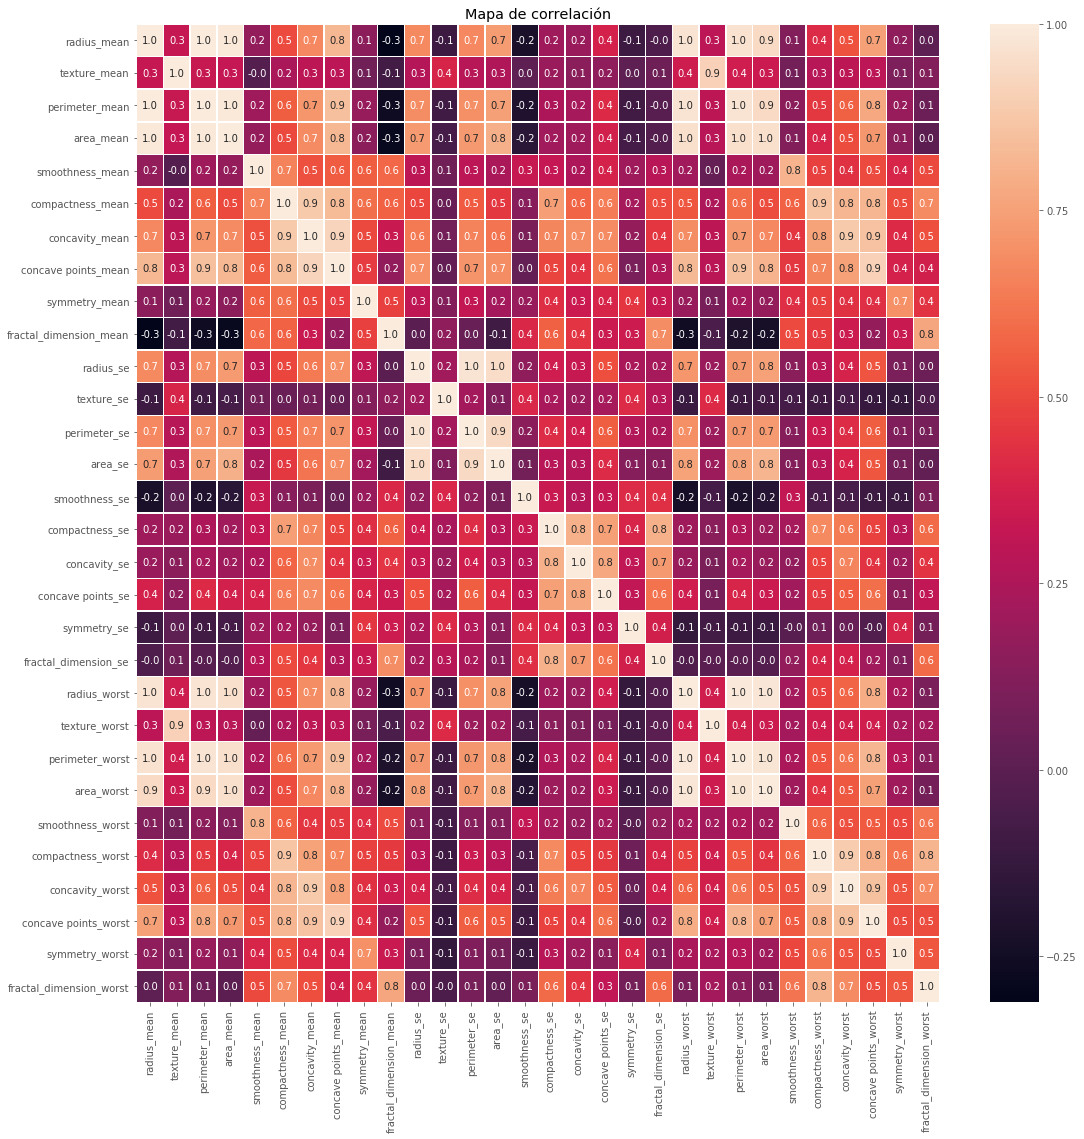

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.tools import plotting
from scipy import stats
plt.style.use("ggplot")
import warnings
warnings.filterwarnings("ignore")
from scipy import stats

data = pd.read_csv("/Users/mayraberrones/Documents/GitHub/Ciencia_de_Datos/w-data.csv")
data = data.drop(['Unnamed: 32','id'],axis = 1)
f,ax=plt.subplots(figsize = (18,18))
sns.heatmap(data.corr(),annot= True,linewidths=0.5,fmt = ".1f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Mapa de correlación')
plt.savefig('graph.png')
plt.show()

De nueva cuenta se realizan los cálculos del ANOVA. El residuo disminuye un poco, y se muestra el 'perimeter mean' como el que no tiene significancia.

In [3]:
d = pd.DataFrame(o, columns = ["diagnosis", "radius_mean", "radius_worst", "perimeter_mean", "area_mean", "perimeter_worst"])
d = d.dropna()  
m = ols('diagnosis ~ radius_mean + radius_worst + perimeter_mean + area_mean + perimeter_worst', data = d).fit() 
a = sm.stats.anova_lm(m, typ = 2)
print(a)
n = len(a)
alpha = 0.01
for i in range(n):
    print("{:s} {:s}es significativo".format(a.index[i], "" if a['PR(>F)'][i] < alpha else "no "))

                    sum_sq     df          F        PR(>F)
radius_mean       2.823529    1.0  35.721341  4.042227e-09
radius_worst      2.279007    1.0  28.832421  1.155901e-07
perimeter_mean    3.698251    1.0  46.787723  2.067895e-11
area_mean         2.501221    1.0  31.643728  2.921120e-08
perimeter_worst   0.294411    1.0   3.724690  5.411561e-02
Residual         44.501319  563.0        NaN           NaN
radius_mean es significativo
radius_worst es significativo
perimeter_mean es significativo
area_mean es significativo
perimeter_worst no es significativo
Residual no es significativo



Después se hacen los cálculos de las interacciones entre los nuevos datos que se le están dando al ANOVA. Aquí se muestra que ninguna de las interacciones que estan con el 'area mean' son significativas, y la suma cuadrada del residuo disminuyó significativamente, lo que es bueno.



In [5]:

d = pd.DataFrame(o, columns = ["diagnosis", "radius_mean", "radius_worst", "perimeter_mean", "area_mean", "perimeter_worst"])
d = d.dropna()  
m = ols('diagnosis ~ radius_worst * perimeter_worst + radius_worst * radius_mean + radius_mean * area_mean + radius_worst * area_mean + perimeter_worst * area_mean', \
        data = d).fit() 
a = sm.stats.anova_lm(m, typ = 2)
print(a)
n = len(a)
alpha = 0.01
for i in range(n):
    print("{:s} {:s}es significativo".format(a.index[i], "" if a['PR(>F)'][i] < alpha else "NO "))

                                 sum_sq     df          F        PR(>F)
radius_worst                   0.040954    1.0   0.646218  4.218099e-01
perimeter_worst                1.825917    1.0  28.811187  1.171105e-07
radius_worst:perimeter_worst   2.724444    1.0  42.989062  1.253716e-10
radius_mean                    5.488121    1.0  86.597183  2.997318e-19
radius_worst:radius_mean       2.716680    1.0  42.866556  1.328781e-10
area_mean                      0.160617    1.0   2.534379  1.119560e-01
radius_mean:area_mean          0.315565    1.0   4.979308  2.604795e-02
radius_worst:area_mean         0.310076    1.0   4.892702  2.737407e-02
perimeter_worst:area_mean      0.148233    1.0   2.338979  1.267378e-01
Residual                      35.426781  559.0        NaN           NaN
radius_worst NO es significativo
perimeter_worst es significativo
radius_worst:perimeter_worst es significativo
radius_mean es significativo
radius_worst:radius_mean es significativo
area_mean NO es significa

Por último se realiza una gráfica de dos componentes, mostrando todos los elementos menos el 'area mean' que es el que no tenia significancia en la interacción con los demás elementos.

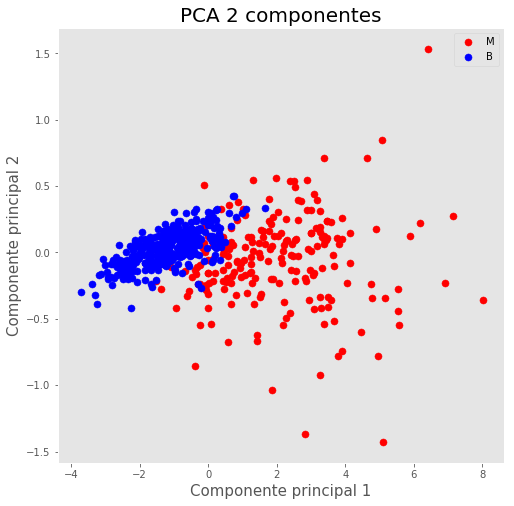

In [7]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

df = pd.DataFrame(data, columns = ["diagnosis", "radius_mean", "radius_worst", "perimeter_mean", "perimeter_worst"])


features = ["radius_mean", "radius_worst", "perimeter_mean", "perimeter_worst"]
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['diagnosis']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, df[['diagnosis']]], axis = 1)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Componente principal 1', fontsize = 15)
ax.set_ylabel('Componente principal 2', fontsize = 15)
ax.set_title('PCA 2 componentes', fontsize = 20)
targets = ['M', 'B']
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['diagnosis'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

Viendo la gráfica podemos sacar en conclusión que la parte dificil de clasificar sería el cluster ese que se hace en la parte media, ya que muchos de los puntos rojos y azules pueden separarse claramente, lo cual muestra porque el resultado de la práctica anterior la especificidad resulta de un 99 porciento, mientras que la sensibilidad baja a ser de un 70 porciento.

Por último solo se quería apreciar la diferencia de incluir las columnas que no mostraban correlación con los demás datos ('area mean', 'texture mean' y 'fractial dimension mean') y quitando los datos que parecían tener mas relación entre ellos y los demás ('radius mean' y 'radius worst'). Esto se hace con el fin de sobresaltar la cualidad de la herramienta de PCA.

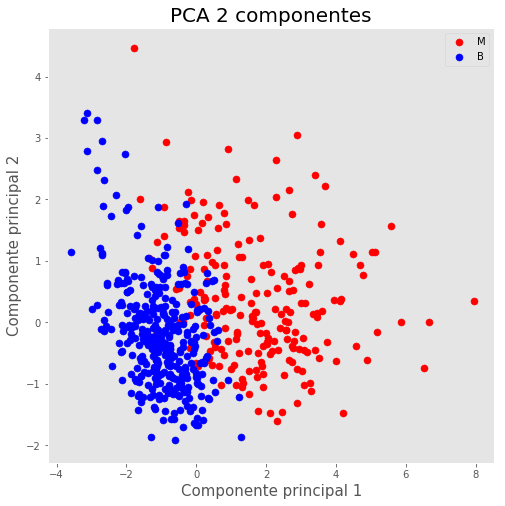

In [11]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

df = pd.DataFrame(data, columns = ["diagnosis",  "perimeter_mean", "perimeter_worst","area_mean","texture_mean","fractal_dimension_mean"])


features = [ "perimeter_mean", "perimeter_worst", "area_mean", "texture_mean","fractal_dimension_mean"]
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['diagnosis']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, df[['diagnosis']]], axis = 1)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Componente principal 1', fontsize = 15)
ax.set_ylabel('Componente principal 2', fontsize = 15)
ax.set_title('PCA 2 componentes', fontsize = 20)
targets = ['M', 'B']
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['diagnosis'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

Ahora se puede apreciar una separación mas visible de los datos, estando estos más dispersos, pero aun asi, existen muchos de los puntos que se mezclan entre ellos. Será interesante ver si el prácticas siguentes podemos averiguar que hacer en este caso para desbaratar el cluster.